# **Lab 34:** *Visualización de datos de series temporales en Python*

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import os

In [5]:
# Leer y previsualizar el dataset
path=os.path.join('Datasets', 'stock_data.csv')
df = pd.read_csv(path, parse_dates=True, index_col = "Date")
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


# 1.Ploteos básicos

<AxesSubplot: xlabel='Date'>

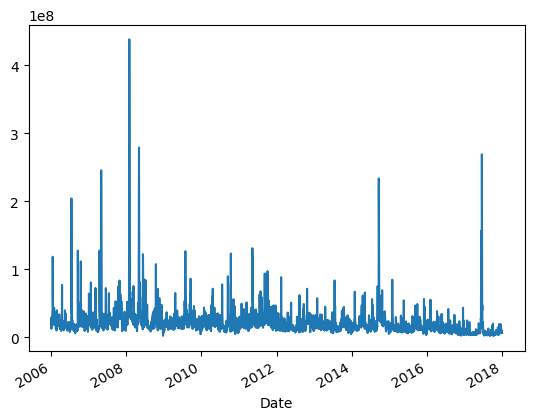

In [6]:
# Ploteo gráfico lineal
df['Volume'].plot()

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

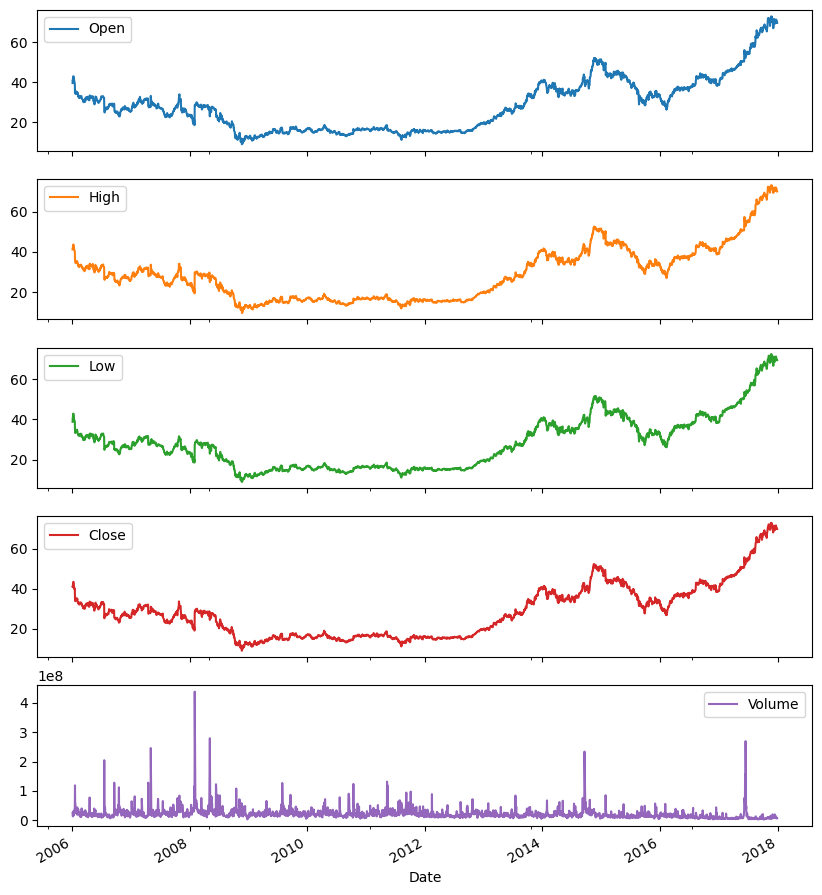

In [7]:
# Subploteo en gráficos de lineas según variables
df.plot(subplots=True, figsize=(10,12))

# 2.Estacionalidad

<BarContainer object of 36 artists>

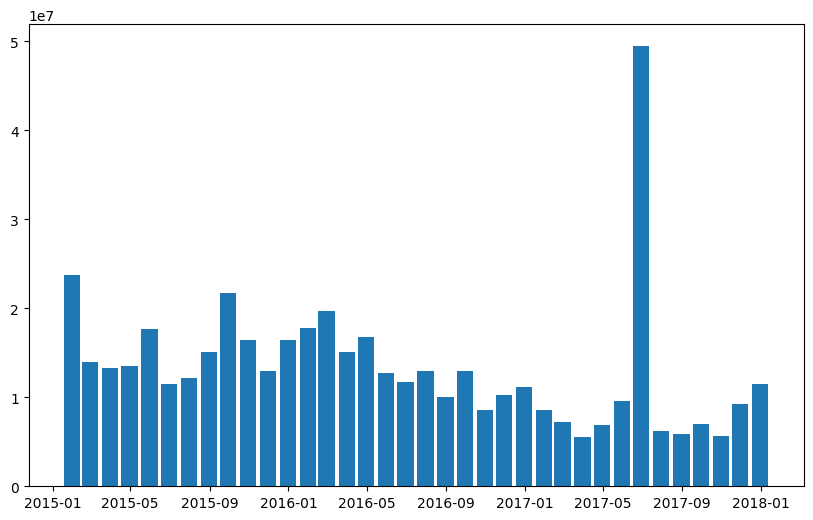

In [8]:
# Gráfico de barras
df_month = df.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df_month['2015':].index,
       df_month.loc['2015':, "Volume"],
       width=25,
       align='center')

In [9]:
# Quitamos el índice de nuestro DF y configuramos la fecha a mes
df.reset_index(inplace=True)
df['month'] = df['Date'].dt.strftime('%b')
df

,Date,Open,High,Low,Close,Volume,Name,month
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Jan
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Jan
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Jan
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jan
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Jan
...,...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA,Dec
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA,Dec
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA,Dec
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA,Dec


In [10]:
"""
La función zip() de Python crea un iterador que agregará elementos de dos o más iterables. 
Puedes usar el iterador resultante para resolver problemas comunes de programación de manera rápida y consistente, 
como la creación de diccionarios. 
Dicho de otra manera, si pasamos dos listas a zip como entrada, 
el resultado será una tupla donde cada elemento tendrá todos y cada uno de los elementos i-ésimos de las pasadas como entrada.
"""

a = [1, 2]
b = ["Uno", "Dos"]
c = zip(a, b)

print(list(c))

[(1, 'Uno'), (2, 'Dos')]


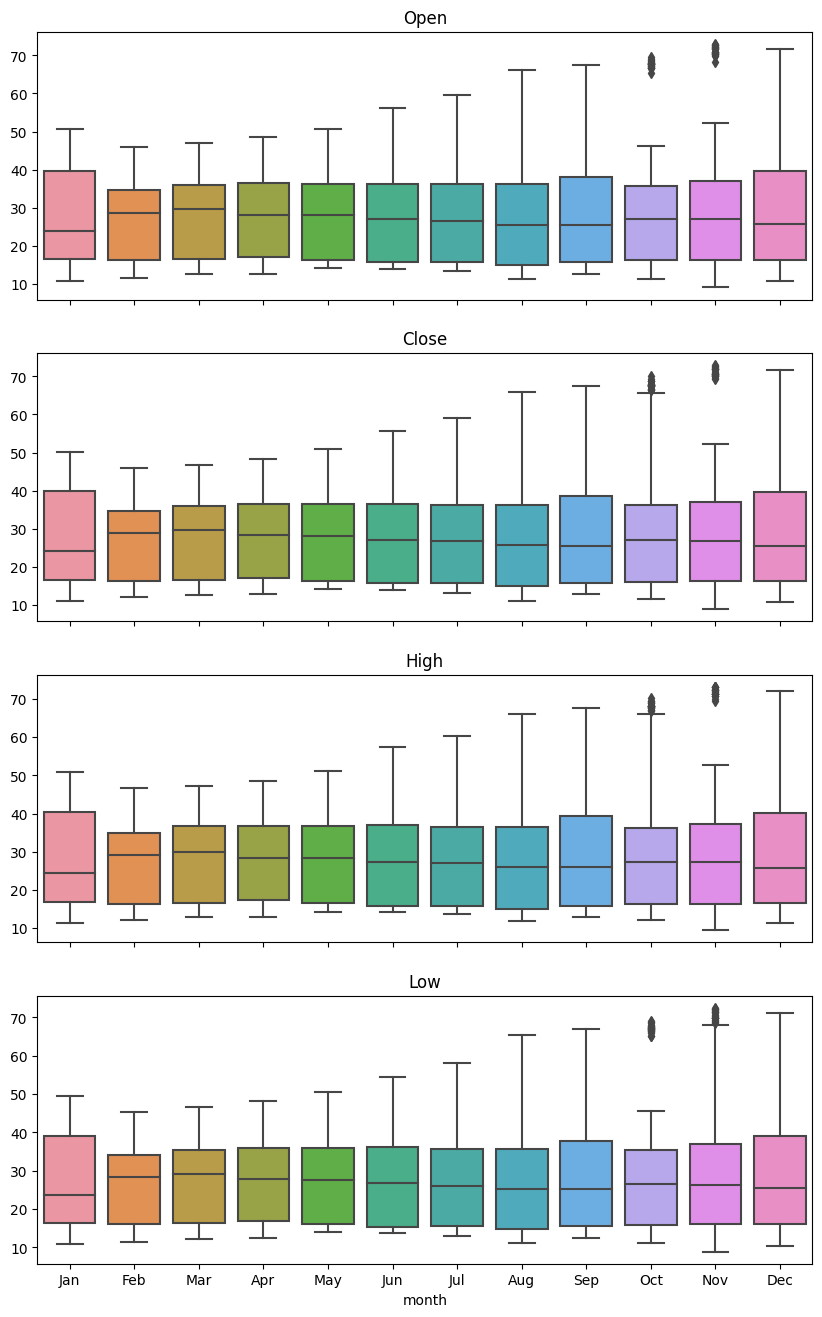

In [11]:
# Boxplot con Seaborn
import seaborn as sns

start, end = '2016-01', '2016-12'
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)

for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes): # Crea pares tipo ('Open', axes); ('Close', axes); etc
  sns.boxplot(data = df, x='month', y=name, ax=ax)
  ax.set_ylabel("")
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')

**Documentación:**
- [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [Subplots Tips and Tricks](https://napsterinblue.github.io/notes/python/viz/subplots/)

# 3.Remuestreo y ventanas deslizantes (*rolling*)

La función pandas `dataframe.rolling ()` proporciona la función de cálculos de ventana móvil. El concepto de cálculo de ventana móvil se utiliza principalmente en el procesamiento de señales y datos de series temporales. En palabras muy simples, tomamos un tamaño de ventana de `k` a la vez y realizamos alguna operación matemática deseada en él. Una ventana de tamaño `k` significa `k` valores consecutivos a la vez. En un caso muy simple, todos los valores de `k` tienen el mismo peso.

<AxesSubplot: xlabel='Date'>

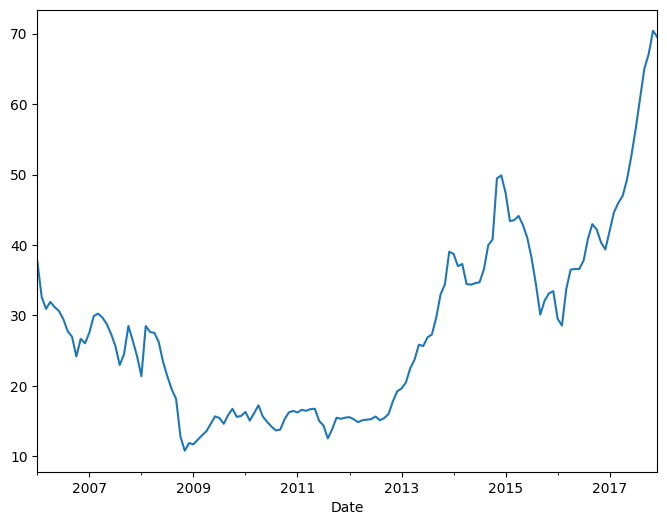

In [13]:
# Gráfico lineal de la variable Volumen
df_month['Low'].plot(figsize=(8, 6))

In [14]:
# Creamos un DF con los datos diarios
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

print(df.shape)

df.head()

(3019, 7)


,Open,High,Low,Close,Volume,Name,month
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Jan
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Jan
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Jan
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jan
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Jan


In [16]:
# Media semanal
df_week = df.resample("w").mean()
df_week

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-08,41.180,42.1050,40.8025,41.6550,21759661.50
2006-01-15,42.234,42.4760,41.4520,41.8120,21727512.20
2006-01-22,36.090,36.7625,35.2875,35.8400,69925107.00
2006-01-29,34.880,35.1200,34.4040,34.7580,27834693.40
2006-02-05,34.744,34.9160,34.1800,34.4440,32027266.60
...,...,...,...,...,...
2017-12-03,71.358,71.8780,70.1520,70.9140,14894345.80
2017-12-10,69.338,70.5220,68.4880,69.4640,10649793.40
2017-12-17,70.504,71.2320,69.5780,70.4120,14514297.80


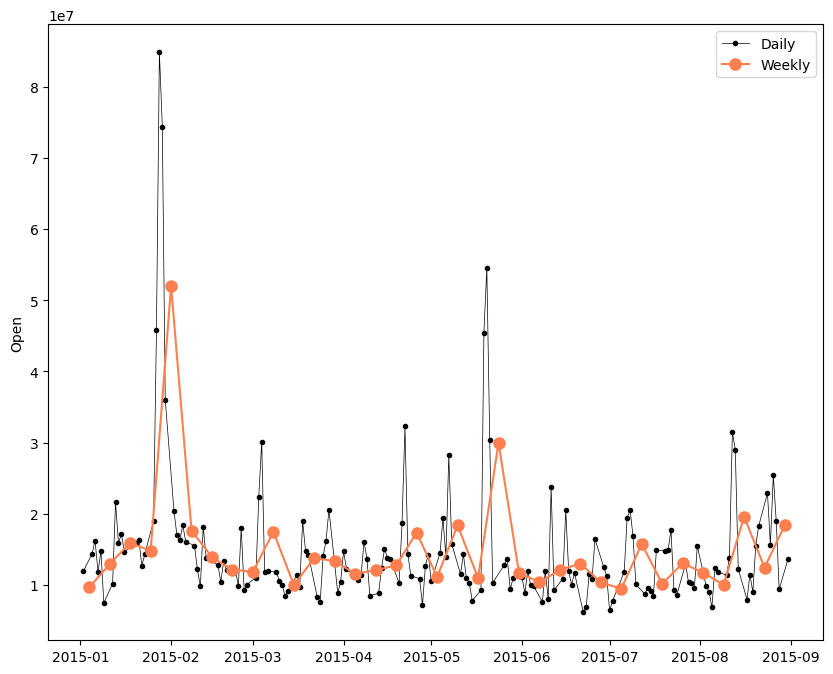

In [17]:
# Gráfico con los datos diarios y el promedio semanal del volumen de las acciones
start, end = '2015-01', '2015-08'
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Open")
ax.legend()

C:\Users\jessd\AppData\Local\Temp\ipykernel_22672\3026092973.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name', 'month'], dtype='object')
  df_7d_rolling = df.rolling(7, center=True).mean()


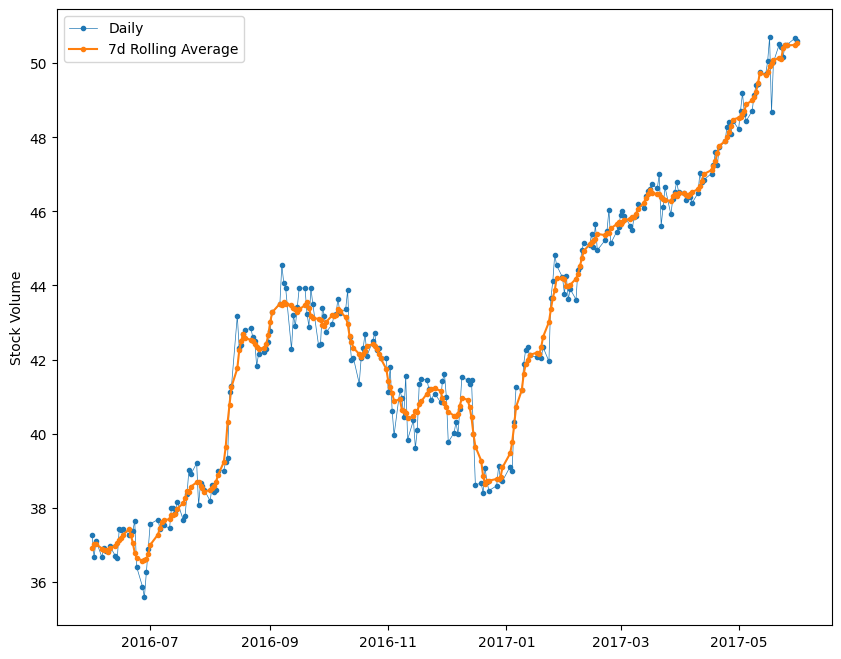

In [20]:
# Promedio rodante de 7 días
df_7d_rolling = df.rolling(7, center=True).mean()
start, end = '2016-06', '2017-05'
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df.loc[start:end, 'Open'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
#ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
#         linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Open'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

**Documentación:** [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

# 4.Cambio (*shift*)

Pandas `dataframe.shift ()` cambia el índice por el número deseado de períodos con una frecuencia de tiempo. Esta función toma un parámetro escalar llamado período, que representa el número de desplazamientos a realizar sobre el eje deseado. Esta función es muy útil cuando se trata de datos de series temporales.

In [21]:
# Ploteando el cambio a través del desplazamiento de los días
"""
dataframe.div:
Get Floating division of dataframe and other, element-wise (binary operator truediv).
Equivalent to dataframe / other, but with support to substitute a fill_value for missing data in one of the inputs. With reverse version, rtruediv.
"""
df['Change'] = df.Close.div(df.Close.shift())
df

,Open,High,Low,Close,Volume,Name,month,Change
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Jan,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Jan,1.001467
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Jan,1.013669
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jan,1.040453
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Jan,1.004860
...,...,...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA,Dec,0.999860
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA,Dec,0.975971
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA,Dec,1.002863


<AxesSubplot: xlabel='Date'>

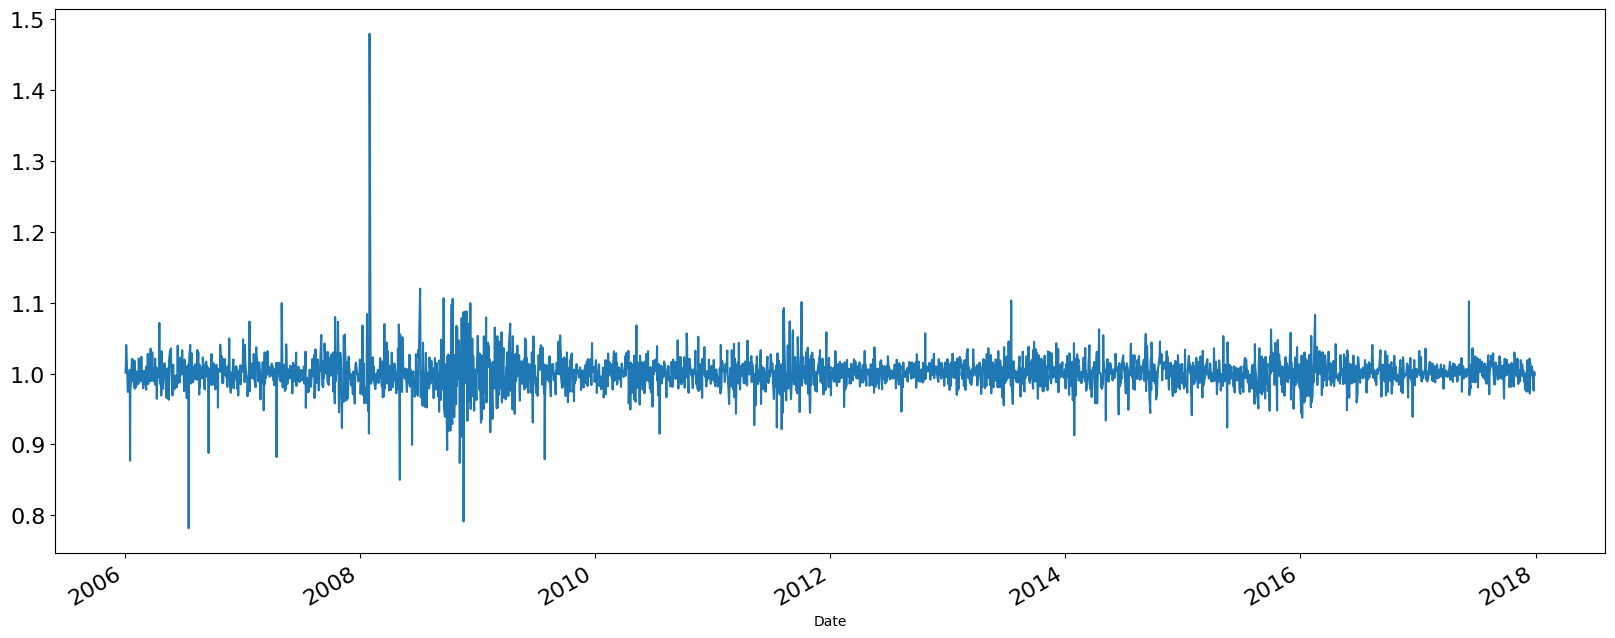

In [22]:
df['Change'].plot(figsize=(20, 8), fontsize = 16)

<AxesSubplot: xlabel='Date'>

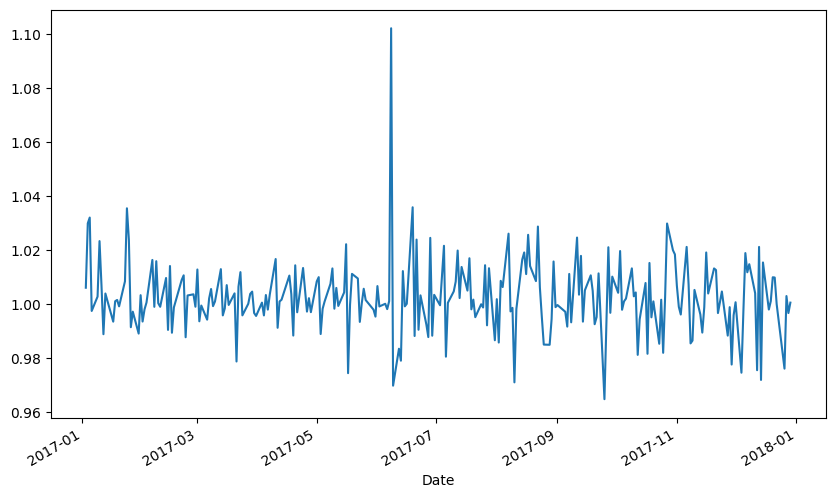

In [23]:
# Ploteando el cambio por desplazamiento para el 2017
df.loc['2017', 'Change'].plot(figsize=(10, 6))

# 5.Cambio porcentual

In [24]:
df.head()

,Open,High,Low,Close,Volume,Name,month,Change
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Jan,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Jan,1.001467
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Jan,1.013669
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jan,1.040453
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Jan,1.004860


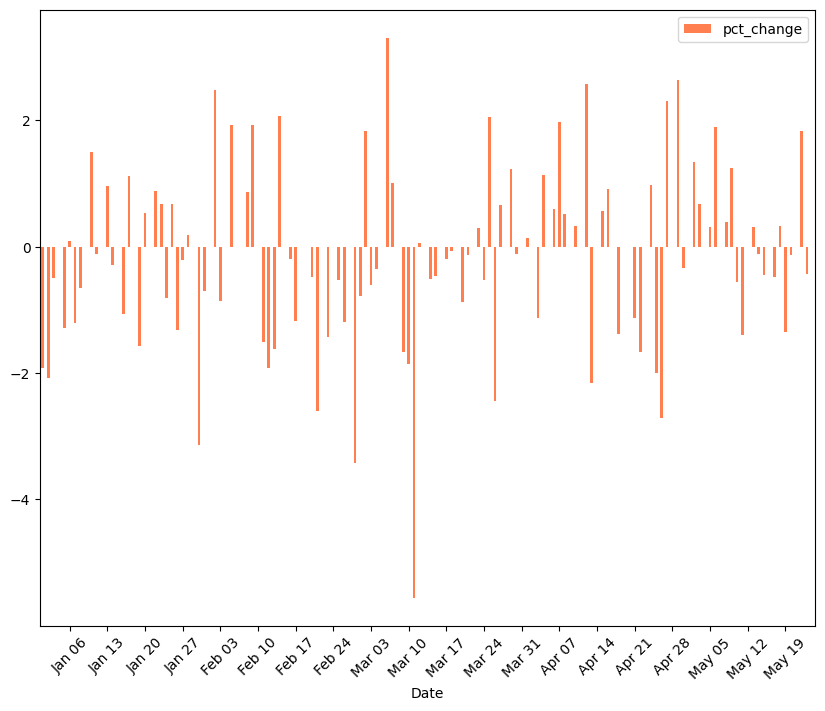

In [25]:
# Ploteo del cambio porcentual
"""
dataframe.pct_change():
Percentage change between the current and a prior element.
Computes the percentage change from the immediately previous row by default. 
This is useful in comparing the percentage of change in a time series of elements
"""
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100
fig, ax = plt.subplots(figsize=(10, 8))
df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend()

**Documentación:**
- [pandas.DataFrame.pct_change](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)
- [matplotlib.dates](https://matplotlib.org/stable/api/dates_api.html)

# 6.Diferenciación

Pandas `dataframe.diff()` se usa para encontrar la primera diferencia discreta de objetos sobre el eje dado. Podemos proporcionar un valor de período para cambiar para formar la diferencia.

<AxesSubplot: xlabel='Date'>

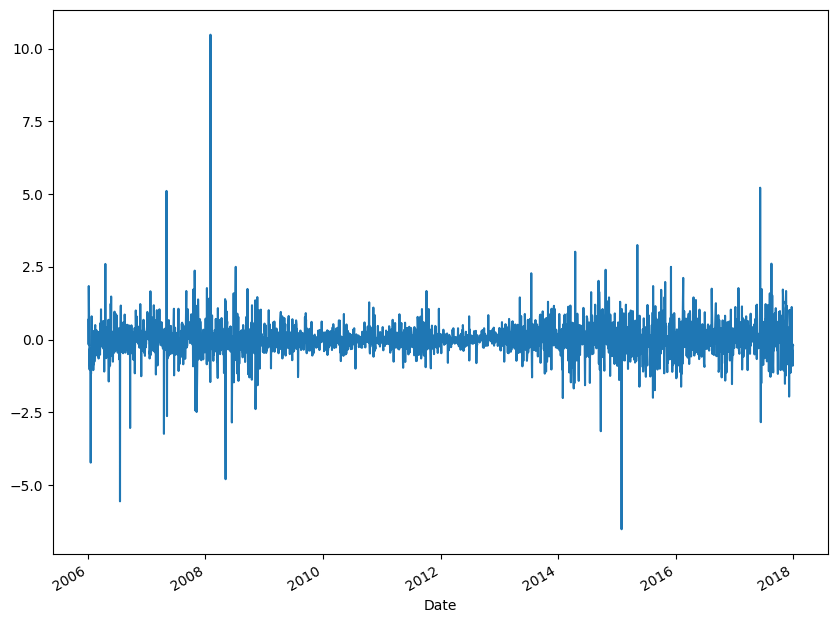

In [26]:
# Calculamos la diferencia de un elemento del DF en comparación con otro elemento del DF
df.High.diff().plot(figsize=(10, 8))

**Documentación:** [pandas.DataFrame.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)

# 7. Ventana expansiva

La diferencia entre la función de desplazamiento y expansión en una sola línea: en la función de desplazamiento, el tamaño de la ventana permanece constante mientras que en la función de expansión cambia.

Ejemplo: suponga que desea predecir el clima, tiene 100 días de datos:

     Rolling: digamos que el tamaño de la ventana es 10. Para la primera predicción, usará (los anteriores) 10 días de datos y predecirá el día 11. Para la próxima predicción, usará del 2.º día (punto de datos) al 11.º día de datos.

     Expandible: para la primera predicción, utilizará 10 días de datos. Sin embargo, para la segunda predicción utilizará 10 + 1 días de datos. Por lo tanto, la ventana se ha "expandido".
         El tamaño de la ventana se expande continuamente en el método posterior.

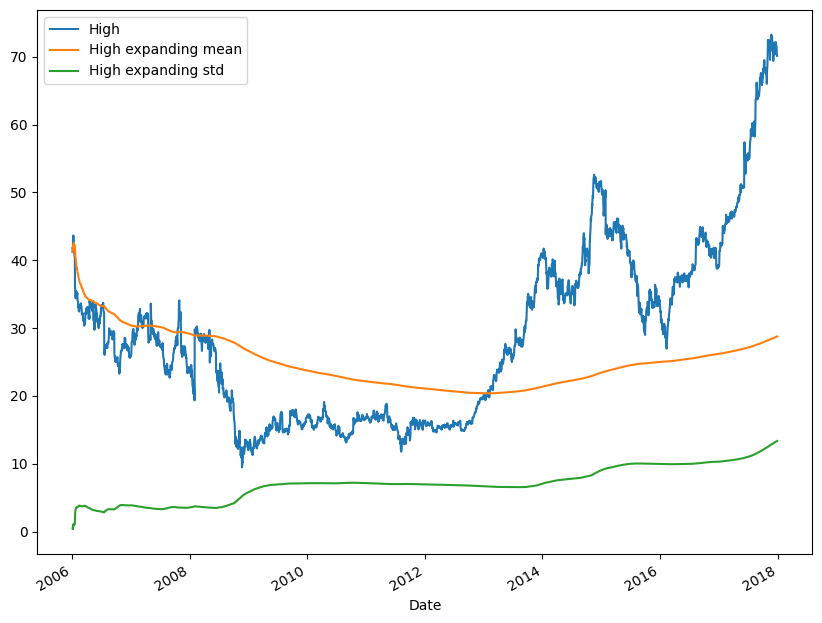

In [27]:
# Ploteo de una ventana expansiva
fig, ax = plt.subplots(figsize=(10, 8))
ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')
ax.legend()

**Documentación:** [pandas.DataFrame.expanding](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html)

# 8.Mapa de calor

In [29]:
# Primero importamos la libreria calendar y creamos un calendario con nuestros datos

import calendar
df['month'] = df.index.month
df['year'] = df.index.year

all_month_year_df = pd.pivot_table(df, values="Open",
                                index=["month"],
                                columns=["year"],
                                fill_value=0)
month_index = [month for month in calendar.month_abbr if month] # month_abbr Mes abreviado
all_month_year_df = all_month_year_df.set_index([month_index])
all_month_year_df

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,38.245500,27.990500,21.926667,12.084500,16.572105,16.441000,15.719500,19.866667,39.268571,48.310500,30.250526,42.256000
Feb,33.141579,30.297368,28.884000,12.601053,15.252632,16.778421,15.445500,20.623684,37.397895,43.861579,29.107000,44.916316
Mar,31.333478,30.549545,28.070000,13.255455,16.256087,16.663043,14.986818,22.673000,37.975238,43.929091,34.064545,46.230870
Apr,32.383684,30.021000,27.930000,13.802381,17.462500,16.853500,15.231500,23.988636,35.254762,44.590476,36.873810,47.207895
May,31.744545,29.288182,26.731905,14.903000,15.965000,17.020476,15.405000,26.160455,34.852857,43.475500,36.822381,49.645909
Jun,31.005455,27.749524,24.046667,16.000000,15.136364,15.255000,15.405238,25.972500,34.901429,41.403182,36.883636,53.327727
Jul,29.893500,25.954286,21.922273,15.792273,14.435714,14.597000,15.781429,27.197273,35.087273,38.580455,38.095500,56.966000
Aug,28.064348,23.283043,19.750952,14.764286,13.790000,12.814348,15.244783,27.579545,36.836190,34.921429,41.082174,61.336522
Sep,27.481000,24.784737,18.612857,16.067143,13.946190,14.174762,15.511053,29.986000,40.662857,30.651905,43.306190,65.530000
Oct,24.528636,29.123913,13.361739,17.060909,15.419524,15.786190,16.151429,33.518696,41.253043,32.425000,42.594286,67.611364


Text(0.5, 1.0, 'Average Opening')

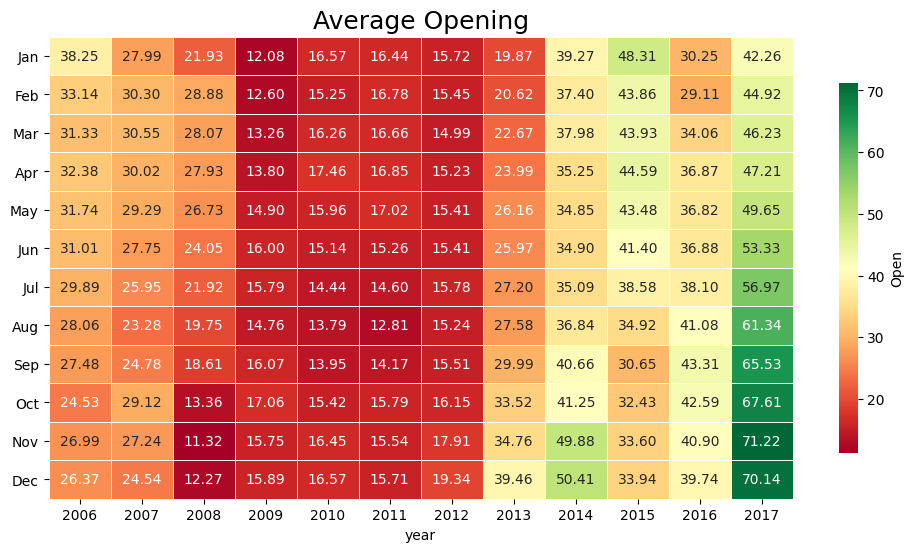

In [30]:
#Ploteamos un mapa de calor

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn',
                fmt='.2f', annot=True, linewidths=.5, ax=ax,
                cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':18})

**Documentación:**
- [calendar — General calendar-related functions](https://docs.python.org/3/library/calendar.html)
- [Python calendar.month_abbr() Examples](https://www.programcreek.com/python/example/7272/calendar.month_abbr)
- [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# 9.Descomposición

La descomposición de series de tiempo implica pensar en una serie como una combinación de componentes de nivel, tendencia, estacionalidad y ruido.

La descomposición proporciona un modelo abstracto útil para pensar en series temporales en general y para comprender mejor los problemas durante el análisis y la previsión de series temporales.


Una abstracción útil para seleccionar métodos de pronóstico es dividir una serie de tiempo en componentes sistemáticos y no sistemáticos.

     Sistemático: Componentes de la serie de tiempo que tienen consistencia o recurrencia y pueden ser descritos y modelados.
     No Sistemático: Componentes de la serie de tiempo que no pueden ser modelados directamente.

Se piensa que una serie de tiempo dada consta de tres componentes sistemáticos que incluyen `nivel`, `tendencia`, `estacionalidad` y un componente no sistemático llamado `ruido`.

Estos componentes se definen de la siguiente manera:

     Nivel: El valor promedio en la serie.
     Tendencia: El valor creciente o decreciente en la serie.
     Estacionalidad: El ciclo de corto plazo que se repite en la serie.
     Ruido: La variación aleatoria en la serie.

In [31]:
pip install statsmodels

  Using cached statsmodels-0.13.5-cp310-cp310-win_amd64.whl (9.1 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


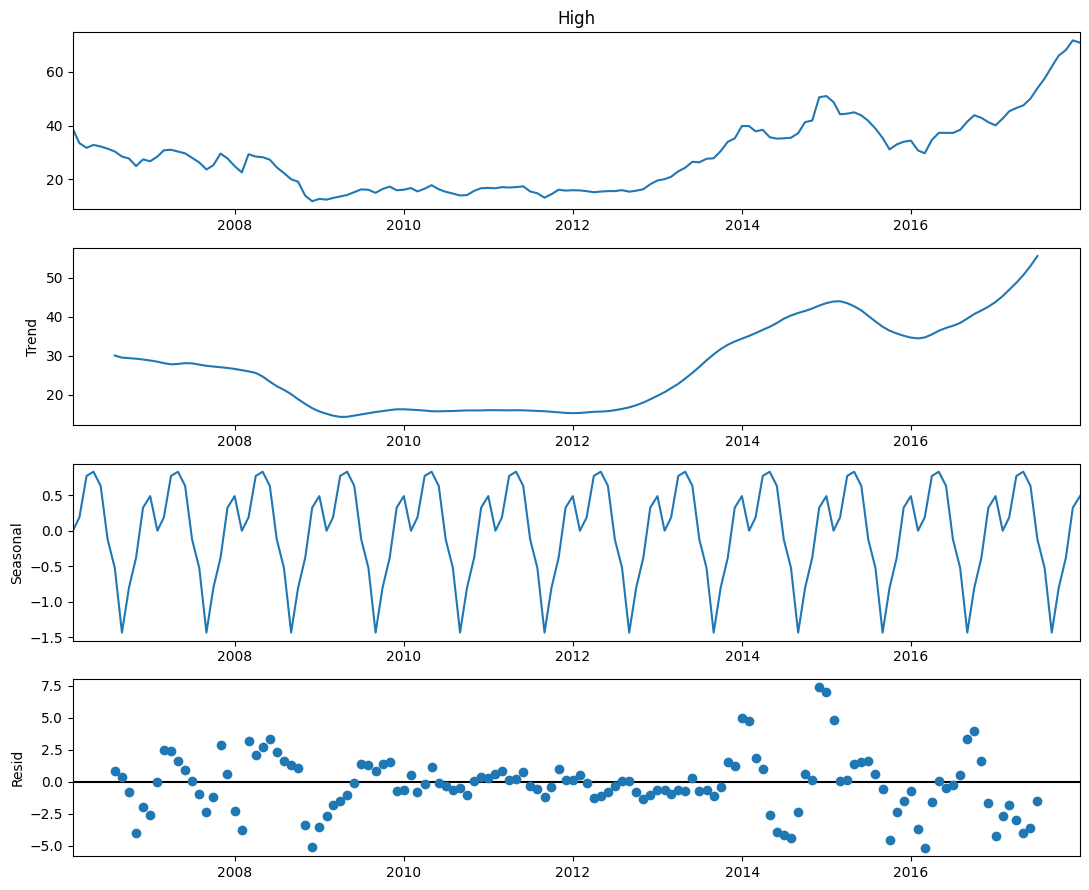

In [32]:
# Descomposición de una serie temporal
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['High'], model='Additive')
"""
Un modelo aditivo sugiere que los componentes son agregados de forma conjunta de la siguiente manera:
y(t) = Level + Trend + Seasonality + Noise
"""
fig = decomposition.plot()
plt.show()

**Documentación:** [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

# Fuente
[Time Series Data Visualization in Python](https://regenerativetoday.com/time-series-data-visualization-in-python/)